In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obesity=pd.read_csv("Obesity prediction.csv")

In [3]:
obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
obesity.dtypes


Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

In [15]:
obesity.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

# plot of the data

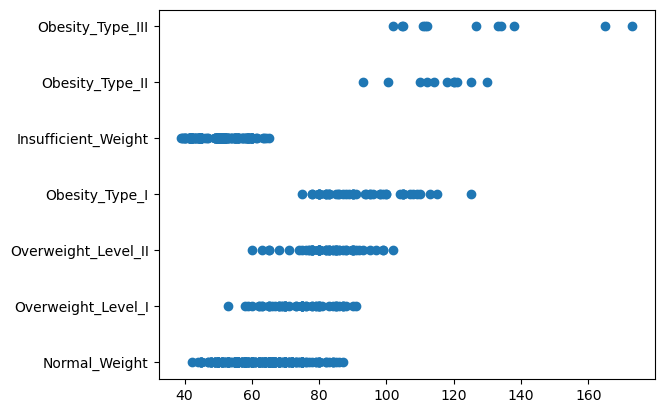

In [49]:
fig,ax =  plt.subplots()
ax.scatter(obesity["Weight"][:700],obesity["Obesity"][:700])

In [18]:
obesity.Obesity.value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

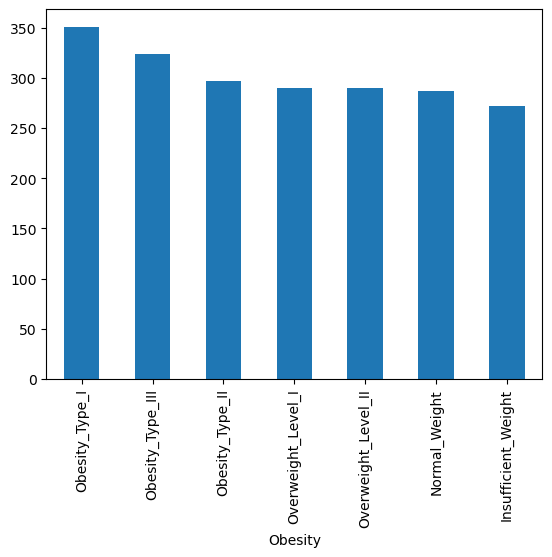

In [25]:
obesity.Obesity.value_counts().plot(kind='bar');

In [26]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [27]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [28]:
len(obesity)

2111

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot = OneHotEncoder(sparse_output=False)
categorical_features = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'Obesity']

# Applying OneHotEncoder to the categorical columns to make it numerical
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)
# Fitting and transform the data
transformed_x = transformer.fit_transform(obesity)
one_hot.fit(obesity[categorical_features])
column_names = (one_hot.get_feature_names_out(categorical_features)).tolist()+obesity.drop(columns=categorical_features).columns.tolist()
transformed_obesity = pd.DataFrame(transformed_x, columns=column_names)
corr_matrix = transformed_obesity.corr()
print(corr_matrix)

                              Gender_Female  Gender_Male  family_history_no  \
Gender_Female                      1.000000    -1.000000           0.102512   
Gender_Male                       -1.000000     1.000000          -0.102512   
family_history_no                  0.102512    -0.102512           1.000000   
family_history_yes                -0.102512     0.102512          -1.000000   
FAVC_no                            0.064934    -0.064934           0.208036   
FAVC_yes                          -0.064934     0.064934          -0.208036   
SMOKE_no                           0.044698    -0.044698           0.017385   
SMOKE_yes                         -0.044698     0.044698          -0.017385   
CAEC_Always                       -0.019296     0.019296           0.073189   
CAEC_Frequently                    0.123224    -0.123224           0.269018   
CAEC_Sometimes                    -0.071790     0.071790          -0.340981   
CAEC_no                           -0.062930     0.06

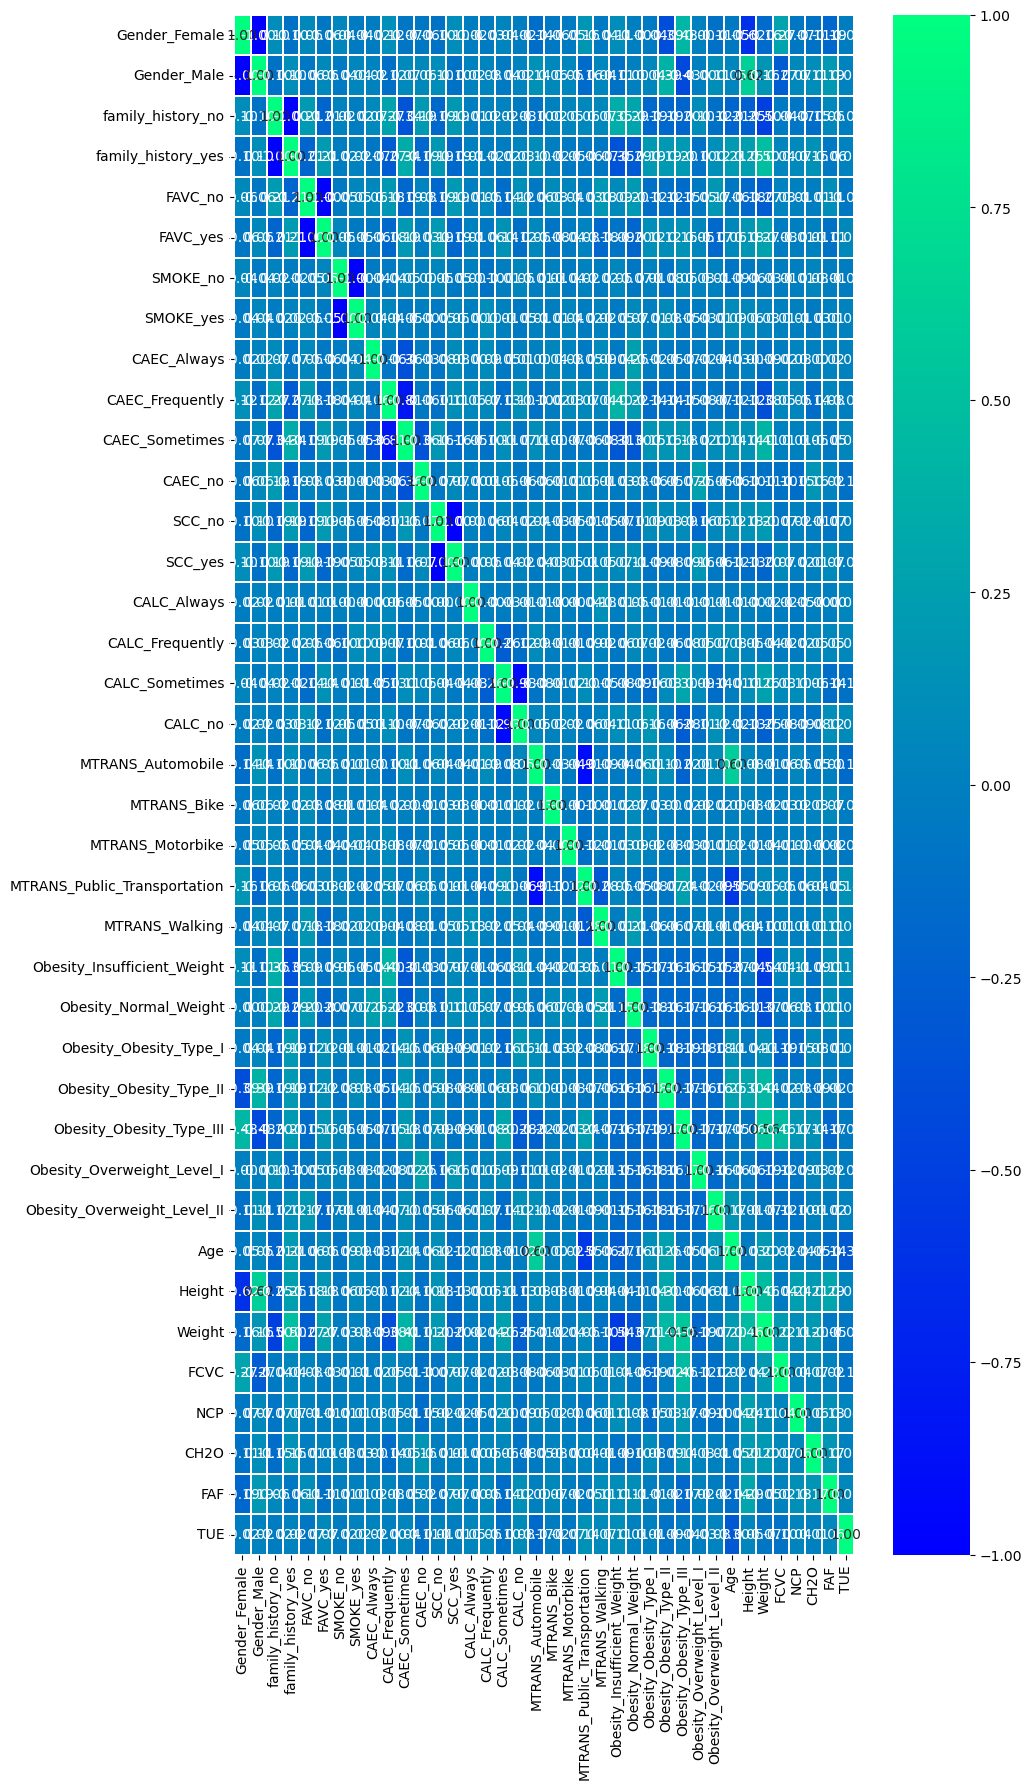

In [37]:
#correlation matrix
import sklearn
import seaborn as sns
corr_matrix=transformed_obesity.corr()
plt.figure(figsize=(10,20))
sns.heatmap(corr_matrix,annot=True,linewidth=0.1,fmt=".2f",cmap='winter');

In [45]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier # Importing the model
def calc_score(target):
    ''' 
    this model is used to train the data provided and fit in to test.
    '''
    np.random.seed(42)
    x = transformed_obesity.drop(columns = [target])
    y = transformed_obesity[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42) #Splitting the data
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    print(f"Target column  Name: {target}")
    print(f"Score for {target}: ",model.score(x_test,y_test))
    features = model.feature_importances_
    imp= pd.DataFrame({'Feature':x.columns,'Importance':features})
    imp= imp.sort_values(by = 'Importance',ascending = False)
    print(imp)

In [46]:
target_c= ['Obesity_Insufficient_Weight', 'Obesity_Normal_Weight', 'Obesity_Obesity_Type_I', 
                  'Obesity_Obesity_Type_II', 'Obesity_Obesity_Type_III', 'Obesity_Overweight_Level_I', 
                  'Obesity_Overweight_Level_II']
for target in target_c:
    calc_score(target)

Target column  Name: Obesity_Insufficient_Weight
Score for Obesity_Insufficient_Weight:  0.9976359338061466
                         Feature  Importance
31                        Weight    0.372746
23         Obesity_Normal_Weight    0.100263
29                           Age    0.069454
33                           NCP    0.052019
9                CAEC_Frequently    0.051701
30                        Height    0.045590
2              family_history_no    0.036101
10                CAEC_Sometimes    0.026966
35                           FAF    0.026664
3             family_history_yes    0.025698
32                          FCVC    0.024707
36                           TUE    0.022118
27    Obesity_Overweight_Level_I    0.020012
34                          CH2O    0.019465
1                    Gender_Male    0.018025
0                  Gender_Female    0.017711
17                       CALC_no    0.009836
16                CALC_Sometimes    0.008203
18             MTRANS_Automobile    0

# importance of each factor that causes obesity is listed above 